### Getting a list of all films from the cineville website

In [ ]:
import random
import time
import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from fake_useragent import FakeUserAgent
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

<html class="wf-freightmicropro-n4-active wf-acuminprowide-n4-active wf-acuminprosemicondensed-i4-active wf-acuminprowide-n7-active wf-acuminprowide-i4-active wf-freightbigpro-n4-active wf-acuminprowide-i7-active wf-freightmicropro-i4-active wf-freightmicropro-n7-active wf-freightmacropro-n7-active wf-freightmacropro-i7-active wf-freightmicropro-i7-active wf-freightbigpro-i7-active wf-freightbigpro-n7-active wf-freightmacropro-i4-active wf-freightmacropro-n4-active wf-freightdisplaypro-n4-active wf-freightdisplaypro-i7-active wf-freightdisplaypro-n7-active wf-freightbigpro-i4-active wf-acuminpro-i4-active wf-acuminpro-i7-active wf-acuminpro-n7-active wf-freightdisplaypro-i4-active wf-acuminprocondensed-n4-active wf-acuminprocondensed-i7-active wf-acuminprocondensed-n7-active wf-acuminpro-n4-active wf-acuminproextracondensed-n4-active wf-acuminproextracondensed-i7-active wf-acuminproextracondensed-n7-active wf-acuminprocondensed-i4-active wf-acuminprosemicondensed-n4-active wf-acuminpro
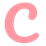

In [61]:
# Function to create a new WebDriver instance with a random User-Agent
def create_driver_with_random_user_agent():
    # Initialize UserAgent
    ua = FakeUserAgent()

    # Set up Chrome options to use a random User-Agent
    chrome_options = Options()
    chrome_options.add_argument(f'--user-agent={ua.random}')
    chrome_options.add_argument("--disable-extensions")  # Disable extensions like Google Optimize
    chrome_options.add_argument("--disable-gpu")  # Optional: Disable GPU to improve performance
    chrome_options.add_argument("--disable-software-rasterizer")  # Optional: Reduce CPU usage
    chrome_options.add_argument("--no-sandbox")  # Optional: Often useful in headless mode
    chrome_options.add_argument("--disable-features=VizDisplayCompositor")  # Optional: Disable some experimental features

    # Set up the Chrome WebDriver using webdriver_manager
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

    return driver

# Instantiate a WebDriver with a random User-Agent
driver = create_driver_with_random_user_agent()

# Go to the website
url = "https://www.cineville.nl/films"
driver.get(url)

# Simulate some movement and scrolling to trigger loading of more content
try:
    # Scroll the page to simulate user interaction
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)  # Wait a bit for content to load after scrolling

    # Scroll a bit more to simulate user activity
    driver.execute_script("window.scrollBy(0, 500);")
    time.sleep(3)  # Wait for more content to load

    # Now fetch the page source with the likely loaded content
    html_content = driver.page_source
    print(html_content)  # Or use BeautifulSoup to parse it

except Exception as e:
    print(f"An error occurred: {e}")

# Close the driver when done
driver.quit()


In [67]:
# Parse HTML using BeautifulSoup
films_soup = BeautifulSoup(html_content, 'html.parser')

# Find all elements with the class 'all-films-list__list'
films_list = films_soup.find_all(class_='all-films-list__list')

# Iterate through the found elements
for film in films_list:
    print(film.prettify())  # Print out the whole <div> element

    # Optionally, get the text of the <p> tags inside this div
    for p in film.find_all('h3'):
        print(f"Film: {p.text}")

<div class="all-films-list__list">
 <ul class="grid grid--for-cards" data-columns="3">
  <li data-colspan="1">
   <section class="card card--with-header-element" data-url="/films/10-things-i-hate-about-you">
    <a class="block-link" href="/films/10-things-i-hate-about-you">
     <header class="card__header">
      <h3 class="card__title">
       10 Things I Hate About You
      </h3>
      <div>
       <figure class="video-still video-still--paused">
        <div class="responsive-image responsive-image--with-aspect-ratio" style="padding-bottom: 56.25%;">
         <img alt="" class="image-replace" data-src="https://filmformatie.imgix.net/filmstills/10thngs.jpg?w={width}" src="https://filmformatie.imgix.net/filmstills/10thngs.jpg?w=600"/>
        </div>
       </figure>
      </div>
     </header>
    </a>
    <article class="card__article">
     <span class="card__article__content">
      <div class="film-card__screening-state-text">
       Morgen te zien in Studio/K
      </div>
    

In [69]:
from bs4 import BeautifulSoup

# Parse HTML using BeautifulSoup
films_soup = BeautifulSoup(html_content, 'html.parser')

# Find all elements with the class 'all-films-list__list'
films_list = films_soup.find_all(class_='all-films-list__list')

# Iterate through the found elements
for film in films_list:
    cards = film.find_all("section", class_="card")
    
    for card in cards:
        # Extract film title
        title_tag = card.find("h3", class_="card__title")
        title = title_tag.text.strip() if title_tag else "Unknown Title"

        # Extract film URL
        link_tag = card.find("a", class_="block-link")
        film_url = link_tag["href"] if link_tag else "Unknown URL"

        # Extract image URL
        img_tag = card.find("img", class_="image-replace")
        img_url = img_tag["src"] if img_tag else "No Image"

        # Extract screening info
        screening_tag = card.find("div", class_="film-card__screening-state-text")
        screening_info = screening_tag.text.strip() if screening_tag else "No screening info"

        # Extract one-liner description
        oneliner_tag = card.find("div", class_="film-card__oneliner")
        oneliner_text = oneliner_tag.text.strip() if oneliner_tag else "No description"

        # Print the extracted details
        print(f"Title: {title}")
        print(f"URL: {film_url}")
        print(f"Image: {img_url}")
        print(f"Screening Info: {screening_info}")
        print(f"Description: {oneliner_text}")
        print("-" * 80)


Title: 10 Things I Hate About You
URL: /films/10-things-i-hate-about-you
Image: https://filmformatie.imgix.net/filmstills/10thngs.jpg?w=600
Screening Info: Morgen te zien in Studio/K
Description: Shakespeare's Het Temmen van de Feeks, maar dan met tieners Joseph Gordon-Levitt, Heath Ledger en Julia Stiles in de hoofdrol.
--------------------------------------------------------------------------------
Title: A Complete Unknown
URL: /films/a-complete-unknown
Image: https://filmformatie.imgix.net/filmstills/A-Complete-Unknown_st_4_jpg_sd-high_2024-Searchlight-Pictures-All-Rights-Reserved-fa04.jpg?w=600
Screening Info: Vanaf morgen te zien in 44 filmtheaters
Description: Timothée Chalamet als Bob Dylan voordat 'ie Bob Dylan was.
--------------------------------------------------------------------------------
Title: A Real Pain
URL: /films/a-real-pain
Image: https://filmformatie.imgix.net/filmstills/A-Real-Pain_st_2_jpg_sd-high_Copyright-The-Walt-Disney-Company-2024-053b.jpg?w=600
Screening

### Collecting the shows for a film

In [ ]:
# Instantiate a WebDriver with a random User-Agent
driver = create_driver_with_random_user_agent()

# Go to the website
url = "https://www.cineville.nl/films/la-haine"
driver.get(url)

# Simulate some movement and scrolling to trigger loading of more content
try:
    # Scroll the page to simulate user interaction
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)  # Wait a bit for content to load after scrolling

    # Scroll a bit more to simulate user activity
    driver.execute_script("window.scrollBy(0, 500);")
    time.sleep(3)  # Wait for more content to load

    # Now fetch the page source with the likely loaded content
    show_content = driver.page_source
    print(show_content)  # Or use BeautifulSoup to parse it

except Exception as e:
    print(f"An error occurred: {e}")

# Close the driver when done
driver.quit()

In [ ]:
# Parse HTML using BeautifulSoup
shows_soup = BeautifulSoup(show_content, 'html.parser')

# Find all elements with the class 'all-films-list__list'
shows = shows_soup.find_all(class_='shows-list__day-group')

# Iterate through the found elements
for show in shows:
    # Get the day (e.g., "morgen" or "maandag 3 maart")
    day = show.find(class_='shows-list__day').text.strip()
    print(f"Day: {day}")

    # Get the show details
    shows_details = show.find(class_='shows-list__shows').find_all(class_='shows-list-item')
    
    for show_detail in shows_details:
        # Get the showtime
        start_time = show_detail.find(class_='shows-list-item__time__start').text.strip()
        end_time = show_detail.find(class_='shows-list-item__time__end').text.strip()
        
        # Get the film title
        film_title = show_detail.find(class_='shows-list-item__title').text.strip()

        # Get the location
        location = show_detail.find(class_='shows-list-item__location__name').text.strip()
        city = show_detail.find(class_='shows-list-item__location__city').text.strip()

        # Get the tags (e.g., "English subs", "Klassieker")
        tags = show_detail.find(class_='shows-list-item__tags').text.strip()

        # Get the ticket links
        ticket_links = show_detail.find_all('a', class_='shows-list-item__ticket-button')
        tickets = [ticket['href'] for ticket in ticket_links]

        # Print out the extracted details
        print(f"  Film Title: {film_title}")
        print(f"  Time: {start_time} - {end_time}")
        print(f"  Location: {location}, {city}")
        print(f"  Tags: {tags}")
        print(f"  Tickets: {tickets}\n")

Day: morgen
  Film Title: La haine
  Time: 16:50 - 18:40
  Location: De Uitkijk, Amsterdam
  Tags: Klassieker, English subs
  Tickets: ['/films/la-haine/shows/2740369/redirect', '/films/la-haine/shows/2740369']

Day: maandag 3 maart
  Film Title: La haine
  Time: 16:45 - 18:35
  Location: De Uitkijk, Amsterdam
  Tags: English subs
  Tickets: ['/films/la-haine/shows/2747764/redirect', '/films/la-haine/shows/2747764']



In [58]:
print(shows)

[]
